In [2]:
from google.colab import files
uploaded=files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


## **REQUIRED LOIBRARIES:-**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

## **READING OF DATASET:-**

In [4]:
df=pd.read_csv('Mall_Customers.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum(axis=1) #ROW WISE SEARCHING OF NULL DATA

,0
0,0
1,0
2,0
3,0
4,0
...,...
195,0
196,0
197,0
198,0


In [6]:
df.duplicated().sum() #CHECKING FOR DUPLICATE DATA

np.int64(0)

## **MACHINE LEARNING PROCESS:-**

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
#ELIMINATING OF CUSTOMER ID:-
df.drop('CustomerID',axis=1,inplace=True)

In [9]:
x=df.iloc[:,2:4]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [10]:
wcss=[]
for i in range(1,9):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=31)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

In [11]:
wcss

[269981.28000000014,
 186234.16783216776,
 106348.37306211119,
 82472.19413919412,
 44448.45544793369,
 38797.9027638142,
 32233.422550637762,
 30069.794232983328]

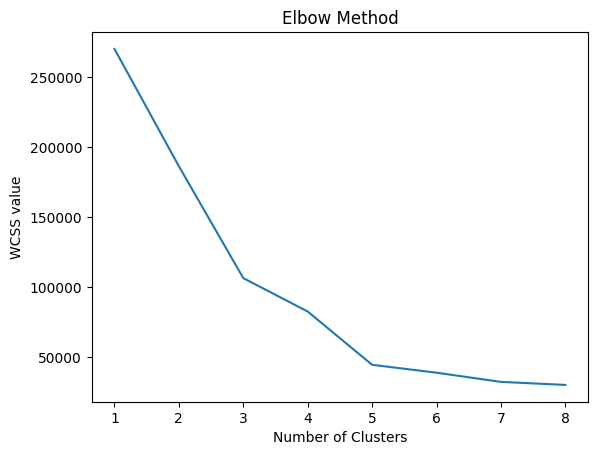

In [12]:
plt.plot(range(1,9),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS value')
plt.title('Elbow Method')
plt.show()

## **FINAL MODEL CREATION:-**

In [13]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=31)
kmeans.fit(x)

KMeans(n_clusters=5, random_state=31)

In [14]:
print(kmeans.cluster_centers_) #ALL THE CENTROIDS POSITIONS

[[25.72727273 79.36363636]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [26.30434783 20.91304348]]


In [15]:
y=kmeans.predict(x) #SHOWS WHICH DATA ELEMENT IS IN WHICH CLUSTER
y

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 3,
       4, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 3, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [17]:
output=pd.DataFrame(y,columns=['cluster number'])#CONVERTING ARRAY INTO DATA FRAME

## **Supervised Dataset:-**

In [18]:
pd.concat([df,output],axis=1)#supervised dataset.

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster number
0,Male,19,15,39,4
1,Male,21,15,81,0
2,Female,20,16,6,4
3,Female,23,16,77,0
4,Female,31,17,40,4
...,...,...,...,...,...
195,Female,35,120,79,2
196,Female,45,126,28,1
197,Male,32,126,74,2
198,Male,32,137,18,1


## **VISUALIZATION:-**

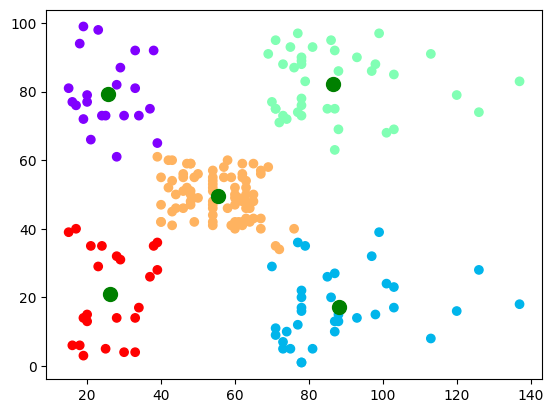

In [21]:
import matplotlib.pyplot as plt
# Assuming 'x' is your DataFrame and 'y' is your cluster assignments
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, cmap='rainbow') # Access columns by position using iloc
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='green')
plt.show()